Here, we make the graphics used in our slideshow.  This is thus rather unstructured, as we're just going through the different images made.  

We import the necessary data directly to save on space and time. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.metrics import recall_score


sns.set_style('dark')
sns.set_palette('husl')
slide_bg='#2e3037'
#Most of the colors used in the slideshow are from seaborn's husl palette, this one is not

importances_df=pd.read_csv(r'..\data_sets\working_importances.csv',header=[0,1],index_col=0)
#The importances of our primary model

true_hat_test_df=pd.read_csv(r'..\data_sets\analyzed_test_data.csv',index_col=0)
#Bring in a "true vs predicted" dataframe for the testa data; we do want to keep the ids as they are. 

with open(r'..\data_sets\sub_counts.p','rb') as file:
    sub_counts=pickle.load(file)
#Bring in the subreddit counts for our original data

with open(r'..\data_sets\working_list.p','rb') as file:
    working_list=pickle.load(file)

Here, we take a look at how our feature importances are spread between those conditioned on extremity and those conditioned on neutrality (for lack of a better word).  Intuitively we'd expect to be more readily "keyed" by features that rely on the extreme case, which we do in fact see seems to hold.

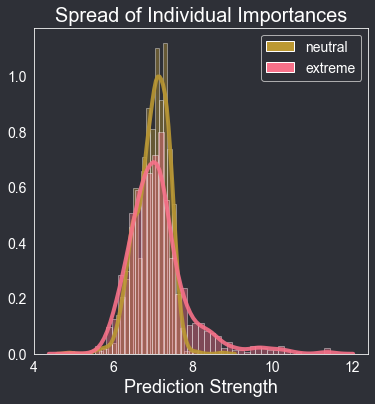

In [4]:
fig,ax=plt.subplots(figsize=(6,6))

sns.distplot(importances_df[('sorted by 1','given 0')],label='neutral',kde_kws={'alpha':.9,'lw':4},color=sns.color_palette('husl')[1])
sns.distplot(importances_df[('sorted by 1','given 1')],label='extreme',kde_kws={'alpha':.9,'lw':4},color=sns.color_palette('husl')[0])
#We set colors manually here to keep the same color convention as before but keep the useful drawing order. 
plt.xlabel('Prediction Strength',{'size':18,'color':'w'})
plt.title('Spread of Individual Importances',{'size':20,'color':'white'})
lgnd=plt.legend(fontsize=14,facecolor=slide_bg)
for txt in lgnd.get_texts():
    txt.set_color('w')
#set the legend text colors to white
for swatch in lgnd.get_patches():
    swatch.set_alpha(1)
#Set the axis patches to be solid
    
ax.set_facecolor(slide_bg)
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
fig.set_facecolor(slide_bg)
#We set the facecolors rather than use transparent to help with workability-- this comes at the expense of us having
#to manually adjust it if we choose to change colors later on, transparent is explicilty left false to help
#prompt that
plt.savefig(r"..\graphics\importances_spread.png",transparent=False,facecolor=slide_bg)

Here, we visualize the top ten predictors for our "extreme" category.  Note we don't give an explicit x-axis, as it's a *little* besides the point, though this is available in the executive notebook's discussion if desired.

C:\Users\shawj\.conda\envs\final_project_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


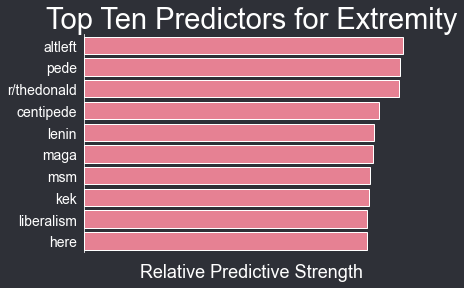

In [192]:
fig,ax=plt.subplots()
sns.set_palette("husl")
sns.set_style('darkgrid',{"xtick.labelsize":50})
sns.barplot(y=importances_df[('sorted by 1','fn')][-10:][::-1],x=importances_df[('sorted by 1','given 1')][-10:][::-1],color=sns.color_palette('husl')[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right');
ax.set_title('Top Ten Predictors for Extremity',size=29,color='w')
ax.set_ylabel('',{'size':18}) #Probably implicit enough
ax.set_xlabel('Relative Predictive Strength',{'size':18,'color':'w'})

ax.set_facecolor(slide_bg)
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
fig.set_facecolor(slide_bg)
sns.despine(bottom=True,right=True)

plt.savefig(r"..\graphics\top_ten_extremity.png",transparent=False,facecolor=slide_bg,bbox_inches='tight')

Here we get a sense of our relative performance on the extreme groups with an eye towards their underlying ideological ("wing") leaning, hoping to see performance indpendent of that-- which again, does seem to hold. 

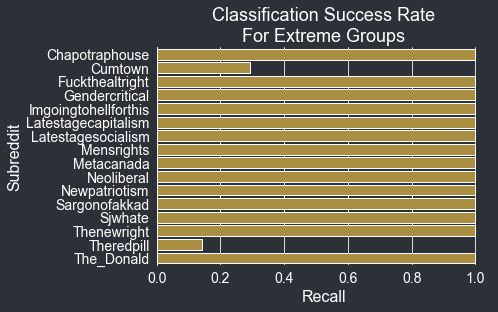

In [193]:
#Preparing the data for graphing.  We find our positive recall scores by:
pos_rec_series=true_hat_test_df[true_hat_test_df.true==1
#Selecting those dataframe entries that *were* for extreme groups
                               ].groupby('subreddit'
#Grouping the results by subreddit                                         
                                        ).apply(lambda g: recall_score(g.true,g.predicted))
#Then calculating the corresponding recall scores-- giving us a series where the index is the subreddit, the value is the
#corresponding recall score

fig,ax=plt.subplots()
sns.barplot(y=pos_rec_series.index,x=pos_rec_series,color=sns.color_palette('husl')[1]);
ax.set_yticklabels([f.get_text().title() for f in ax.get_yticklabels()],ha='right')
plt.title('Classification Success Rate\nFor Extreme Groups',color='w',size=18,)
ax.set_xlabel('Recall',color='w',size=16)
ax.set_ylabel('Subreddit',color='w',size=16)
ax.tick_params(axis='both', labelsize=14,labelcolor='w')


ax.set_facecolor(slide_bg)
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
fig.set_facecolor(slide_bg)
sns.despine(bottom=True)
plt.savefig(r"..\graphics\success_rate.png",transparent=False,facecolor=slide_bg,bbox_inches='tight')

Here we create a visualization of the distribution of subreddit sizes in our original data set, using the subcounts file made in the [executive notebook](../executive_notebook.ipynb).

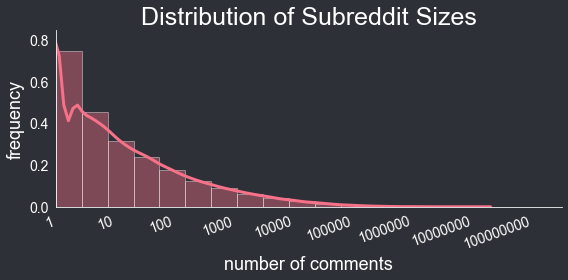

In [3]:
sns.set_style('dark')
fig,ax=plt.subplots(figsize=(8,4));
sns.distplot(np.log(sub_counts)/np.log(10),bins=16,kde_kws={'lw':3});
ax.set_xticks(range(0,10));
ax.set_xticklabels([str(10**k) for k in range(0,10)],rotation=20,ha='right');
ax.set_ylabel('frequency',{'size':18,'color':'w'})
ax.set_xlabel('number of comments',{'size':18,'color':'w'})
ax.tick_params(axis='both', labelsize=14)
plt.title("Distribution of Subreddit Sizes",{'size':25,'color':'w'});
ax.set_facecolor(slide_bg)
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
fig.set_facecolor(slide_bg)
plt.xlim(0,8.5);
sns.despine()
plt.tight_layout()
# plt.savefig(r"..\graphics\size_distribution.png",transparent=False,facecolor=slide_bg,bbox_inches='tight')


We also make a version of the above two graphs for use in the executive notebook and readme:

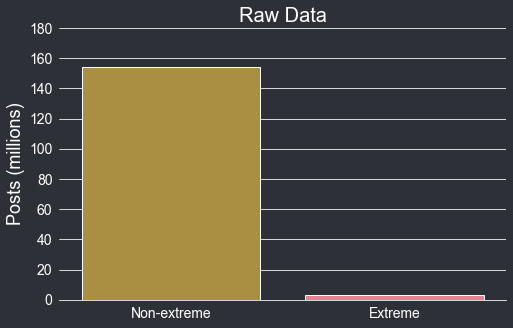

In [181]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(
    x=[1,2],y=[subcounts.sum()-(subcounts[working_list].sum()),subcounts[working_list].sum()],
palette=[sns.color_palette('husl')[1],sns.color_palette('husl')[0]]
)
ax.set_xticks(ax.get_xticks());
ax.set_yticks(ax.get_yticks());
ax.set_xticklabels(['Non-extreme','Extreme'],size=18,color='w');
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()/10**6]);

ax.set_ylabel('Posts (millions)',{'size':18},color='w')
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
ax.set_xlabel('')

ax.set_facecolor(slide_bg)
fig.set_facecolor(slide_bg)
plt.title('Raw Data',{'size':20},color='w');
sns.despine(left=True)
plt.savefig(r'..\graphics\raw_data_sizes.png',transparent=False,facecolor=slide_bg)

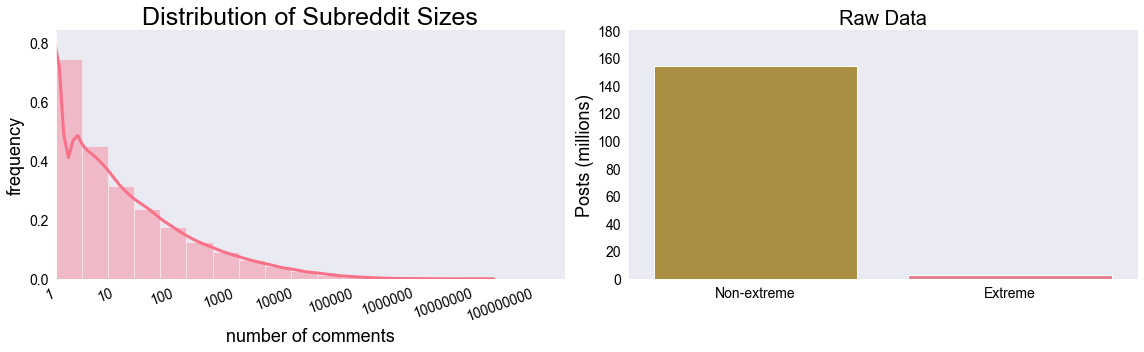

In [15]:
#Notice much here is either just commented out or switched to what would be the default black color. 



fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
sns.set_style('dark')

#Distribution plot
sns.distplot(np.log(sub_counts)/np.log(10),bins=16,kde_kws={'lw':3},ax=ax1);
ax1.set_xticks(range(0,10));
ax1.set_xticklabels([str(10**k) for k in range(0,10)],rotation=20,ha='right');
ax1.set_ylabel('frequency',{'size':18,'color':'k'})
ax1.set_xlabel('number of comments',{'size':18,'color':'k'})
ax1.tick_params(axis='both', labelsize=14)
ax1.set_title("Distribution of Subreddit Sizes",{'size':25,'color':'k'});
# ax.set_facecolor(slide_bg)
ax1.tick_params(axis='both', labelsize=14,labelcolor='k')
# fig.set_facecolor(slide_bg)
ax1.set_xlim(0,8.5);

#Raw data sizes plot
sns.barplot(
    x=[1,2],y=[sub_counts.sum()-(sub_counts[working_list].sum()),sub_counts[working_list].sum()],
palette=[sns.color_palette('husl')[1],sns.color_palette('husl')[0]],ax=ax2
)
ax2.set_xticks(ax2.get_xticks());
ax2.set_yticks(ax2.get_yticks());
ax2.set_xticklabels(['Non-extreme','Extreme'],size=18,color='k');
ax2.set_yticklabels(['{:,.0f}'.format(x) for x in ax2.get_yticks()/10**6]);

ax2.set_ylabel('Posts (millions)',{'size':18},color='k')
ax2.tick_params(axis='both', labelsize=14,labelcolor='k')
ax2.set_xlabel('')
ax2.set_title('Raw Data',{'size':20},color='k');


sns.despine()
plt.tight_layout()
plt.savefig(r"..\graphics\size_distribution_readme.png",transparent=True,bbox_inches='tight')

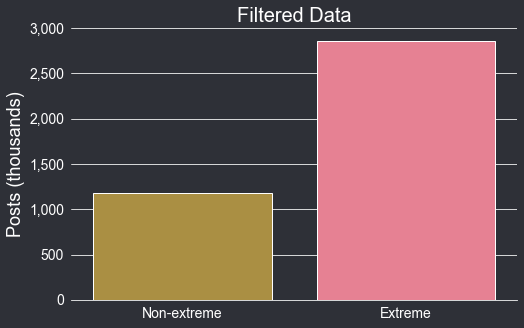

In [190]:
sns.set_style('darkgrid')

fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(skeleton.label,palette=[sns.color_palette('husl')[1],sns.color_palette('husl')[0]]);
ax.set_xticks(ax.get_xticks());
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(['Non-extreme','Extreme'],size=18,color='w')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()/10**1],color='w');
#Divide by 10 because we're already in batches of 100
ax.set_ylabel('Posts (thousands)',{'size':18},color='w')
ax.tick_params(axis='both', labelsize=14,labelcolor='w')
ax.set_xlabel('')
plt.title('Filtered Data',{'size':20},color='w')
ax.set_facecolor(slide_bg)
fig.set_facecolor(slide_bg)
sns.despine(left=True)
plt.savefig(r'..\graphics\filtered_data_sizes.png',transparent=False,facecolor=slide_bg)